# Text To Summary

In [1]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt

In [2]:
def create_dictionary_table(text_string) -> dict:
    
    #removing stop words
    stop_words = set(stopwords.words("english"))    
    words = word_tokenize(text_string)
    
    #reducing words to their root form
    stem = PorterStemmer()
    
    #creating dictionary for the word frequency table
    frequency_table = dict()
    for wd in words:
        wd = stem.stem(wd)
        if wd in stop_words:
            continue
        if wd in frequency_table:
            frequency_table[wd] += 1
        else:
            frequency_table[wd] = 1

    return frequency_table

In [3]:
def calculate_sentence_scores(sentences, frequency_table) -> dict:   

    #algorithm for scoring a sentence by its words
    sentence_weight = dict()

    for sentence in sentences:
        sentence_wordcount = (len(word_tokenize(sentence)))
        sentence_wordcount_without_stop_words = 0
        for word_weight in frequency_table:
            if word_weight in sentence.lower():
                sentence_wordcount_without_stop_words += 1
                if sentence[:7] in sentence_weight:
                    sentence_weight[sentence[:7]] += frequency_table[word_weight]
                else:
                    sentence_weight[sentence[:7]] = frequency_table[word_weight]

        sentence_weight[sentence[:7]] = sentence_weight[sentence[:7]] / sentence_wordcount_without_stop_words       

    return sentence_weight

In [4]:
def calculate_average_score(sentence_weight) -> int:
   
    #calculating the average score for the sentences
    sum_values = 0
    for entry in sentence_weight:
        sum_values += sentence_weight[entry]

    #getting sentence average value from source text
    average_score = (sum_values / len(sentence_weight))

    return average_score

In [5]:
def get_article_summary(sentences, sentence_weight, threshold):
    sentence_counter = 0
    article_summary = ''

    for sentence in sentences:
        if sentence[:7] in sentence_weight and sentence_weight[sentence[:7]] >= (threshold):
            article_summary += " " + sentence
            sentence_counter += 1

    return article_summary

In [6]:
def run_article_summary(article):
    
    #creating a dictionary for the word frequency table
    frequency_table = create_dictionary_table(article)

    #tokenizing the sentences
    sentences = sent_tokenize(article)

    #algorithm for scoring a sentence by its words
    sentence_scores = calculate_sentence_scores(sentences, frequency_table)

    #getting the threshold
    threshold = calculate_average_score(sentence_scores)

    #producing the summary
    article_summary = get_article_summary(sentences, sentence_scores, 1.1 * threshold)

    return article_summary

In [7]:
def run_all(filename):
    file = open(filename, encoding="utf8")
    article_content = file.read()
    summary_results = run_article_summary(article_content)
    return summary_results

 To be more specific, we look for keys with a crisp action that quickly rebound when a finger is removed. Alternatives are acceptable if their quality holds up. Multi-touch gestures should be included, and we look for them to operate without a jerky or uncertain feel. Using the laptop naturally reveals the quality of the display, but there are also tests used to provide a measurable impression. Audio quality is judged by a number of subjective tests. A typical benchmark includes YouTube HD, podcasts, and streaming music. Peacekeeper, a web browser benchmark, is our most demanding test. We test systems using Chrome. Next up, we have our iMacro test. A pause between each load provides downtime. This tends to be the least demanding test in our suite. We also run these tests on MacOS systems, but we use Mac default applications (like Safari). With ChromeOS, we only conduct the Peacekeeper and iMacro tests. The results are often referenced in our reviews. We also measure fan noise during ou

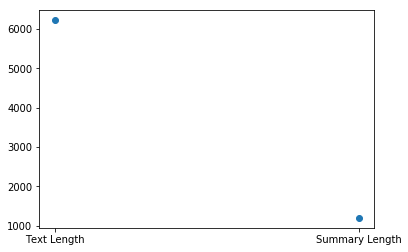

In [8]:
import matplotlib.pyplot as plt
file = open("laptoptestingdell.txt", encoding="utf8")
article_content = file.read()
summary_results = run_article_summary(article_content)
X = ["Text Length","Summary Length"]
Y = [len(article_content),len(summary_results)]
print(summary_results)
plt.scatter(X,Y)

plt.show()

# Summary To Speech

In [9]:
from gtts import gTTS 
import IPython

In [10]:
def summary_to_speech(summary_results):
    language = 'en'
    audio = gTTS(text = summary_results, lang = language, slow = False) 
    audio.save("summarytospeech.mp3")
    IPython.display.Audio("summarytospeech.mp3")

# ChatBot

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import random
import threading
from PIL import Image 
import tkinter




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Somya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
GREETING_RESPONSES = ["hi", "hey", ":)", "hi there", "hello:)", "I am glad! You are talking to me! :)"]
corpus = []

print("hello I am your Chatbot, ready to help you! or if you are bored just type 'quit' and I'll leave :(")
resp = input()

while resp != "quit" or resp != "Quit":

    title = re.sub('[^a-zA-Z]', ' ',resp)
    title = title.lower()
    title = title.split()
    ps = PorterStemmer()
    title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
    title = ' '.join(title)
    corpus.append(title)
       
    if (title.find('hey') != -1 or title.find('hello') != -1 or title.find('hi') != -1or title.find('yo') != -1): 
        print (random.choice(GREETING_RESPONSES))
    if (title.find(' progress monitor stand') != -1 or title.find('monitor stand') != -1 or title.find(' status monitor stand') != -1): 
        print ("30% progress is done by the manufacturing team in this project. You can go to the link______________ for the AR tutorial.  ")
        summary_results = run_all("laptoptestingdell.txt")
        print(summary_results)
        language = 'en'
        audio = gTTS(text = summary_results, lang = language, slow = False) 
        audio.save("summarytospeech.mp3")
        
        
    elif (title.find(' dell cloud storage') != -1 or title.find('cloud') != -1): 
        summary_results = run_all("cloud storage.txt")
        print(summary_results)
        language = 'en'
        audio = gTTS(text = summary_results, lang = language, slow = False) 
        audio.save("summarytospeech.mp3")
        
    elif (title.find('Alienware') != -1 or title.find('game laptop') != -1):         
        img = Image.open('Alienware.jpeg')        
        img.show()
        summary_results = run_all("laptoptestingdell.txt")
        print(summary_results)
        language = 'en'
        audio = gTTS(text = summary_results, lang = language, slow = False) 
        audio.save("summarytospeech.mp3")
        
    if resp == 'audio':   
        break    
    resp = input()
    if resp == "quit" or resp == "Quit" :
        break
IPython.display.Audio("summarytospeech.mp3")     

hello I am your Chatbot, ready to help you! or if you are bored just type 'quit' and I'll leave :(
hey
hi there
game laptop
 To be more specific, we look for keys with a crisp action that quickly rebound when a finger is removed. Alternatives are acceptable if their quality holds up. Multi-touch gestures should be included, and we look for them to operate without a jerky or uncertain feel. Using the laptop naturally reveals the quality of the display, but there are also tests used to provide a measurable impression. Audio quality is judged by a number of subjective tests. A typical benchmark includes YouTube HD, podcasts, and streaming music. Peacekeeper, a web browser benchmark, is our most demanding test. We test systems using Chrome. Next up, we have our iMacro test. A pause between each load provides downtime. This tends to be the least demanding test in our suite. We also run these tests on MacOS systems, but we use Mac default applications (like Safari). With ChromeOS, we only co